<p style="font-size: 20px; color: red;">Author: Amit Kumar<br>
</p>

<br>
<p style="font-size: 50px;">Ambani Wedding Invite. <a href="http://mlr.cs.umass.edu/ml/datasets/Adult">(Dataset)</a></p>
<br>

<img src="./wedding-invite.jpg">

# Problem Statement

Mr. Ambani wants to create the guest list for his daughter’s marriage. He doesn’t want to leave out rich people from the city. But he also doesn’t want to call a lot of people.

You, a data scientist at Reliance, are given the task to make sure his invite list is concise yet including most of the rich people in the city.

The problem is you do not have an account for people’s income. Your market research team was able to gather income data for roughly 50,000 people identifying them as rich (Income > Dollar 50k/year) or not rich (Income < Dollar 50k/year).

Train a model based on this data which will then be used to create the entire invite list. For each person, you have identified 14 attributes based on which you will have to identify them as rich or poor.

The criteria Mr. Ambani has set is **roughly 90% rich of all the rich people in the city must be on the invite list**. A winning model would be one which reduces the total invitees satisfying the criteria.
<hr>

### Attribute Information:

Listing of attributes: 

">50K, <=50K."

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Importing packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing Dataset

**Note: Im using both the train and test dataset available. I'm not splitting the training set into train and test.**

In [2]:
# importing the dataset as pandas DataFrames
train = pd.read_csv('./data/adult_train.csv', index_col=False, skipinitialspace=True)
test = pd.read_csv('./data/adult_test.csv', index_col=False, skipinitialspace=True)
train_data = [train]
test_data = [test]
# skipinitialspace is to to remove whitespace after CSV delimiters

In [3]:
train.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary']
test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary']

# Prelimnary Data Analysis

In [4]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# lets take a look at the dataset
train.head(7)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [6]:
train.shape
# so the dataset(training) has ~32k rows and 15 features

(32561, 15)

In [7]:
test.shape
# so the dataset(test) has ~16k rows and 15 features

(16281, 15)

In [8]:
# lets see all the columns(features) in the dataset
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [9]:
test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

## Descriptive Statistics

### parameter: 'age'

In [10]:
# lets look at the statistics for 'age' parameter
train['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

Inference of 'age' parameter:

- the **mean** age of all the people is 38, which means _most people are young._
- **minimum age** is 13 and **maximum age** is 90

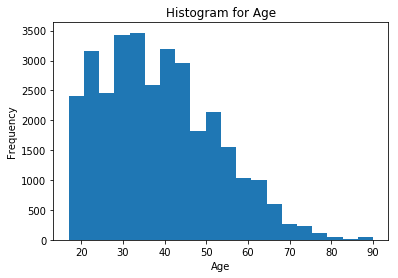

In [11]:
# lets plot a histogram of age
plt.hist(train['age'], bins=20)
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Histogram for Age')
figsize = (20, 20)
plt.rcParams["figure.figsize"] = figsize
plt.show()

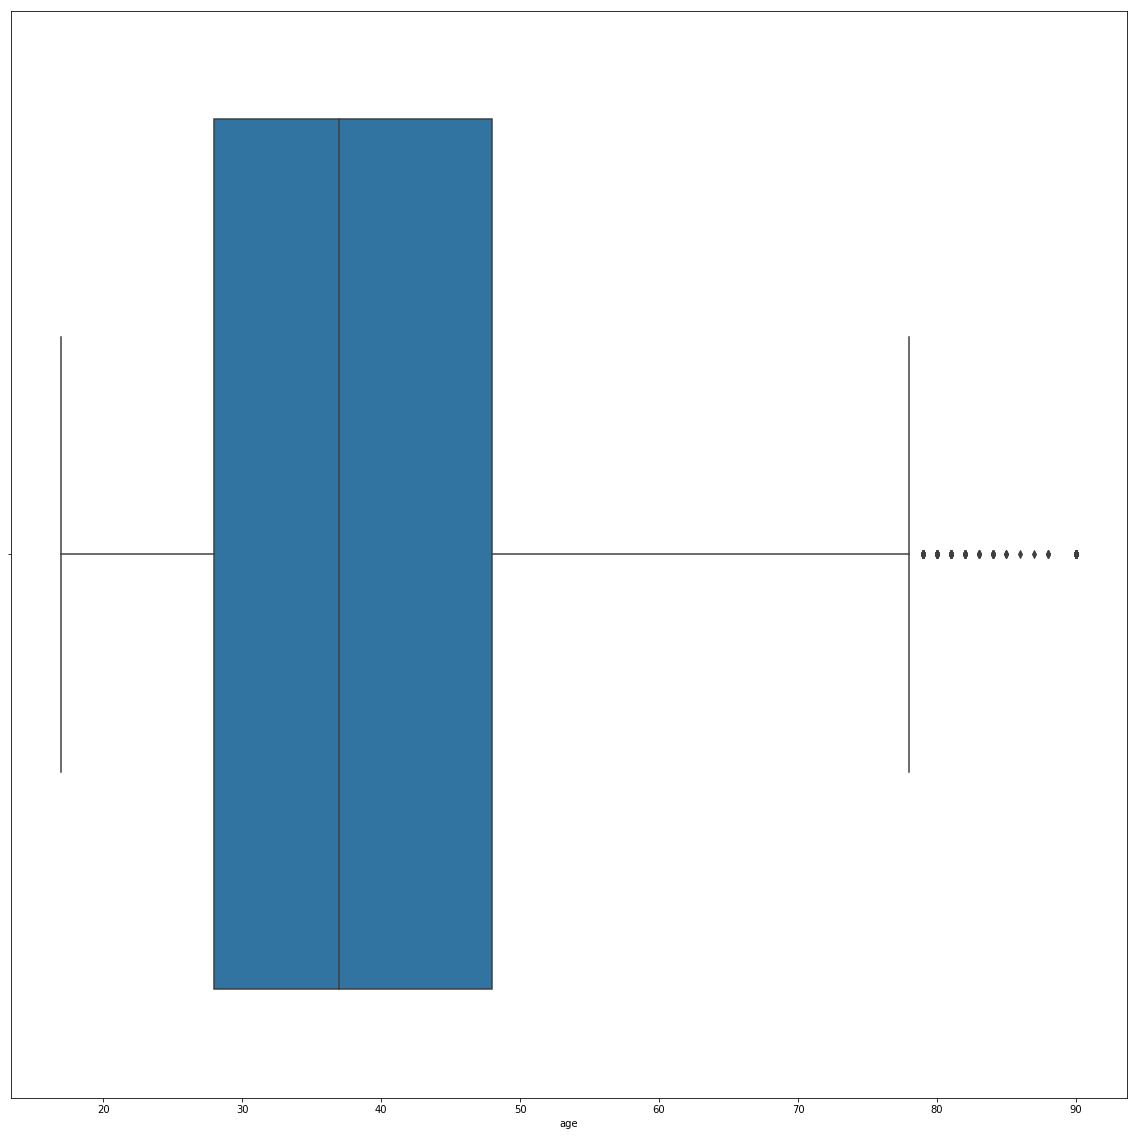

'\nAnalysis:\n- median age is ~35\n- There are some outliers, people who are very old, represented by the dots\n- A little more than half of the people are aged above the median age\n'

In [12]:
# lets see the 'age' distribution using boxplot
# plt.boxplot(age)
sns.boxplot(train['age'])
plt.show()
'''
Analysis:
- median age is ~35
- There are some outliers, people who are very old, represented by the dots
- A little more than half of the people are aged above the median age
'''

### parameter: 'workclass'

In [13]:
# Lets see how many people belong to different work class in Mr Ambani's friend circle
# to do this i will extract the 'workclass' columns and make a dictionary out of it, then i will plot a bar graph
workclass = train.iloc[:, 1:2]
type(workclass)

pandas.core.frame.DataFrame

In [14]:
# lets convert workclass to list so that we can make a dictionnary out of it
workclass = workclass.values.T.tolist()
print(type(workclass))
workclass = workclass[0]

# converting list to dictionary
my_dict = {}
for i in workclass:
    if i not in my_dict:
        my_dict[i] = 1
    else:
        my_dict[i] = my_dict[i] + 1

print(my_dict)

<class 'list'>
{'State-gov': 1298, 'Self-emp-not-inc': 2541, 'Private': 22696, 'Federal-gov': 960, 'Local-gov': 2093, '?': 1836, 'Self-emp-inc': 1116, 'Without-pay': 14, 'Never-worked': 7}


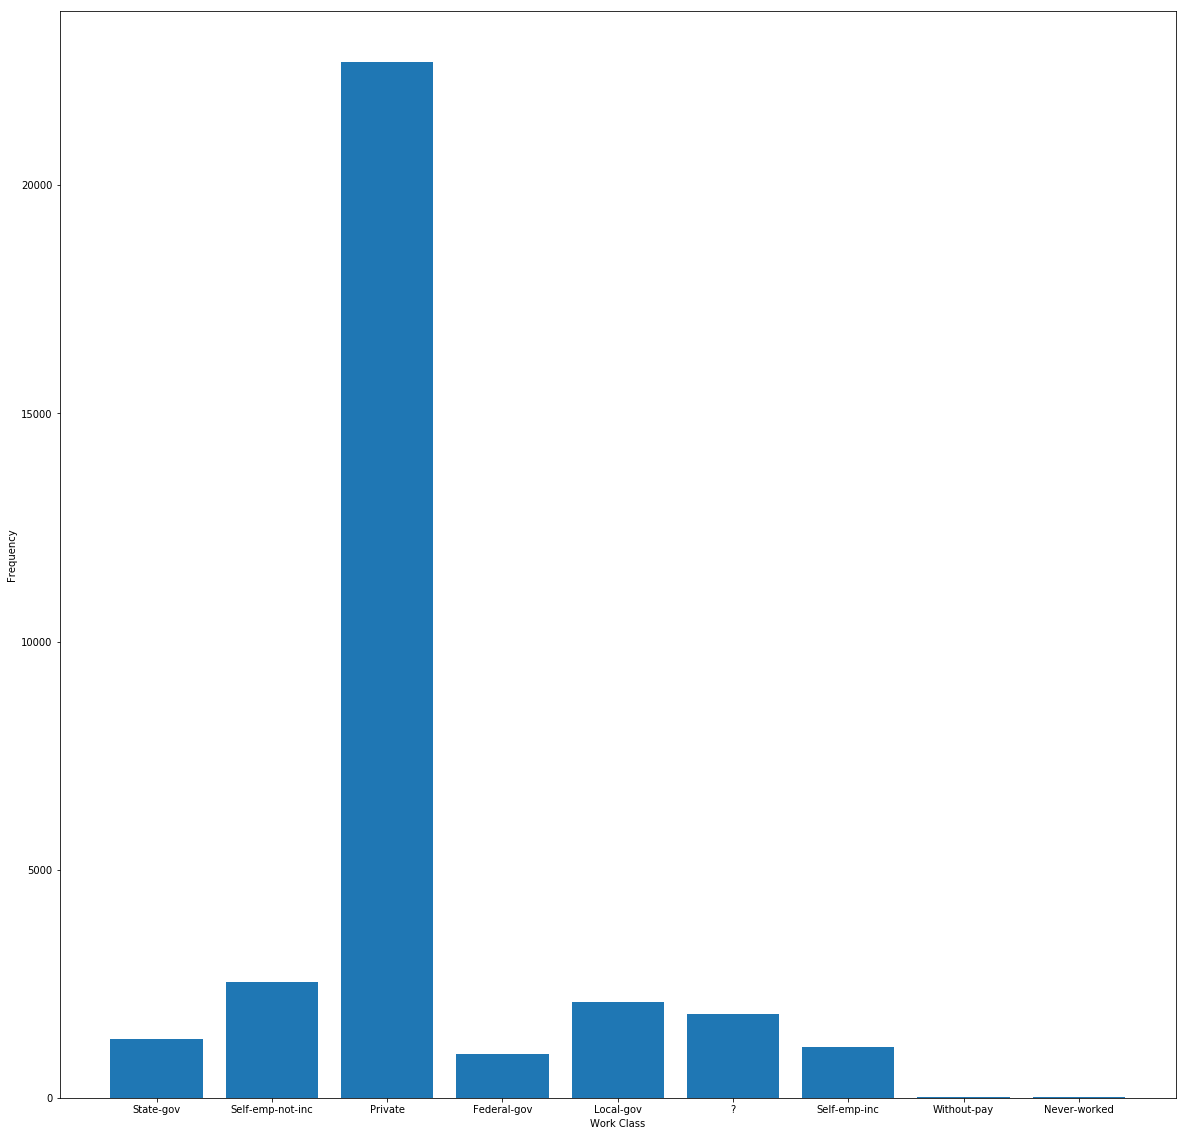

In [15]:
# plotting bar chart
plt.bar(range(len(my_dict)), list(my_dict.values()), align='center')
plt.xticks(range(len(my_dict)), list(my_dict.keys()))
plt.rcParams["figure.figsize"] = (20,15)
#plt.title('Bar Chart for the work class of Mr Ambani\'s Potential Guests')
plt.ylabel('Frequency')
plt.xlabel('Work Class')
plt.show()

Inference: 

- A majority, infact most of Mr Ambani's potential guests work in Private Sector
- Being a very powerful man, he also has connections with people working in State, Federal and Local Government
- He is also aquainted with self-employed people.
- The sixth bar shows a relativetly good number of people who belong to unknown work class.

<hr>

### parameter: education

In [16]:
edu =  train.iloc[:, 3:4]
edu = edu.values.T.tolist()
edu = edu[0]

print(type(edu))

# converting list to dictionary
my_dict_2 = {}
for i in edu:
    if i not in my_dict_2:
        my_dict_2[i] = 1
    else:
        my_dict_2[i] = my_dict_2[i] + 1
        
print(my_dict_2)

<class 'list'>
{'Bachelors': 5355, 'HS-grad': 10501, '11th': 1175, 'Masters': 1723, '9th': 514, 'Some-college': 7291, 'Assoc-acdm': 1067, 'Assoc-voc': 1382, '7th-8th': 646, 'Doctorate': 413, 'Prof-school': 576, '5th-6th': 333, '10th': 933, '1st-4th': 168, 'Preschool': 51, '12th': 433}


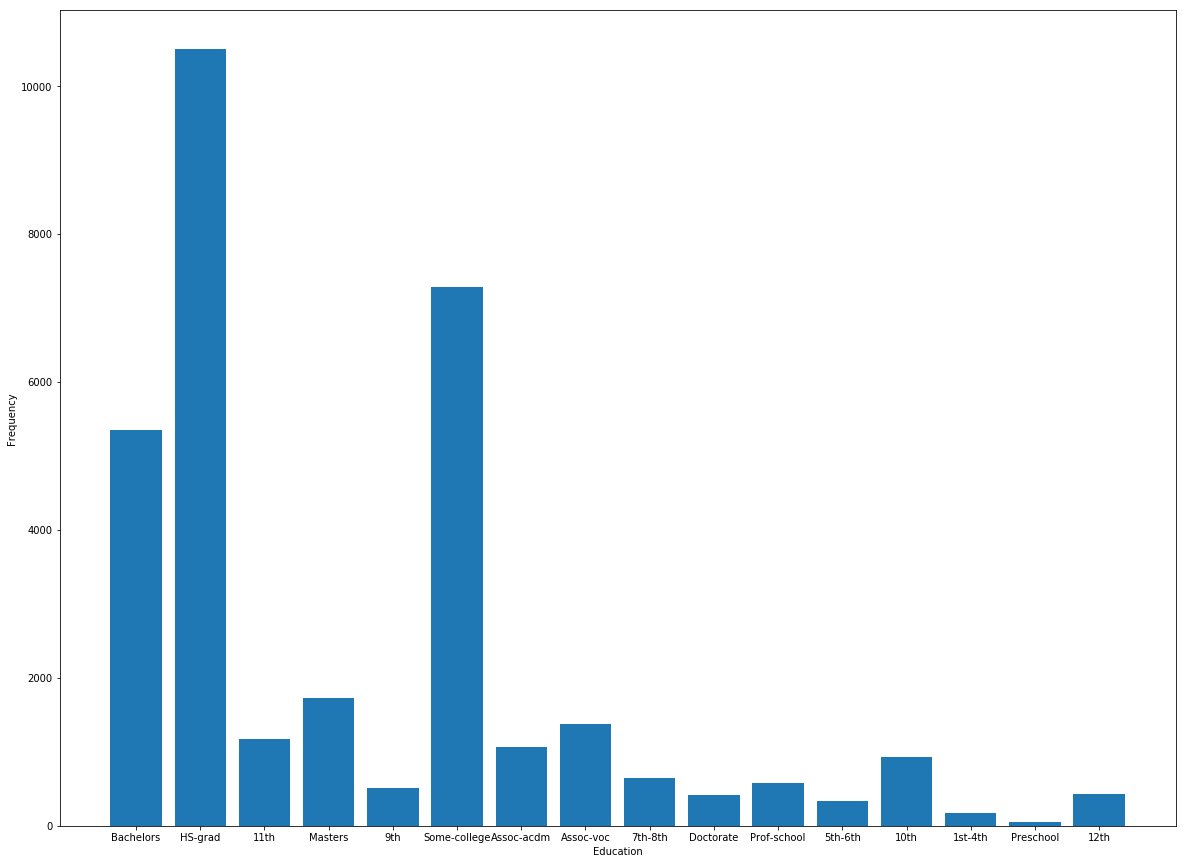

In [17]:
# plotting bar chart
plt.bar(range(len(my_dict_2)), list(my_dict_2.values()), align='center')
plt.xticks(range(len(my_dict_2)), list(my_dict_2.keys()))
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Frequency')
plt.xlabel('Education')
plt.show()

Inference:
    
- As expected most of his guests are highly qualified

<hr>

### Countplot for salary vs other categorical features

[]

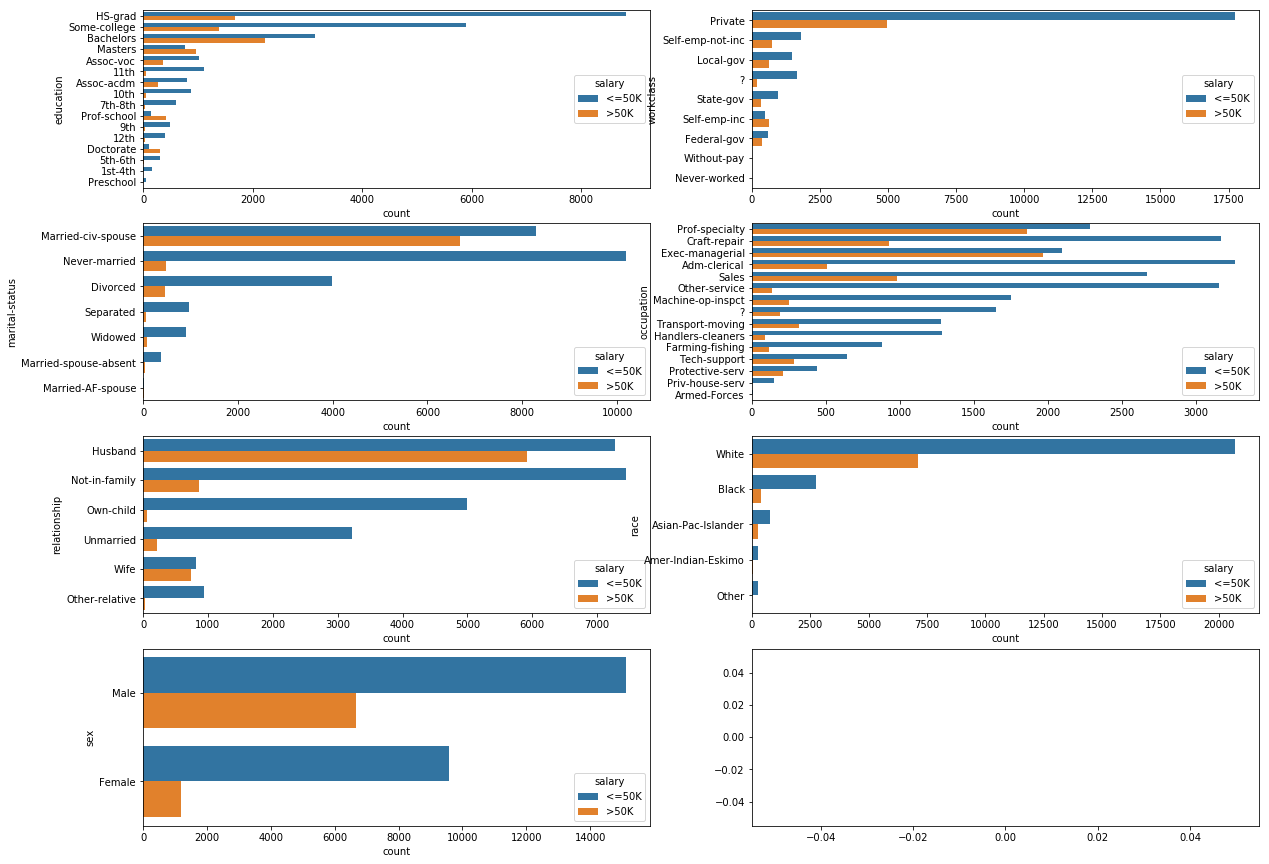

In [18]:
to_count = ['education','workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20,15))
[sns.countplot(y=feature, hue='salary', data=train, order=train[feature].value_counts().index , ax=axs.flatten()[idx]) for idx, feature in enumerate(to_count)]

plt.plot()

# Data Cleaning

In [ ]:
# # importing the dataset as pandas DataFrames
# train = pd.read_csv('./data/adult_train.csv', index_col=False, skipinitialspace=True)
# test = pd.read_csv('./data/adult_test.csv', index_col=False, skipinitialspace=True)
# train_data = [train]
# test_data = [test]
# # skipinitialspace is to to remove whitespace after CSV delimiters

In [ ]:
# train.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
#        'marital-status', 'occupation', 'relationship', 'race', 'sex',
#        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
#        'salary']
# test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
#        'marital-status', 'occupation', 'relationship', 'race', 'sex',
#        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
#        'salary']

### Converting salary to integer

In [19]:
# for training set
print('For training set.')
print('='*40)
salary_map={'<=50K':1,'>50K':0}
train['salary']=train['salary'].map(salary_map).astype(int)
    
print (train.head(10))

For training set.
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White   

In [20]:
# for test set
print('For test set.')
print('='*40)
salary_map={'<=50K.':1,'>50K.':0}
test['salary']=test['salary'].map(salary_map).astype(int)
    
print (test.head(10))

For test set.
   age         workclass  fnlwgt     education  education-num  \
0   25           Private  226802          11th              7   
1   38           Private   89814       HS-grad              9   
2   28         Local-gov  336951    Assoc-acdm             12   
3   44           Private  160323  Some-college             10   
4   18                 ?  103497  Some-college             10   
5   34           Private  198693          10th              6   
6   29                 ?  227026       HS-grad              9   
7   63  Self-emp-not-inc  104626   Prof-school             15   
8   24           Private  369667  Some-college             10   
9   55           Private  104996       7th-8th              4   

       marital-status         occupation   relationship   race     sex  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        

### Convert sex to integer

In [21]:
# for training set
train['sex'] = train['sex'].map({'Male':1,'Female':0}).astype(int)

print (train.head(10))
print (("-"*40))
print (train.info())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race  sex  \
0          Never-married       Adm-clerical  Not-in-family  White    1   
1     Married-civ-spouse    Exec-managerial        Husband  White    1   
2               Divorced  Handlers-cleaners  Not-in-family  White    1   
3     Married-civ-spo

In [22]:
# for test set
test['sex'] = test['sex'].map({'Male':1,'Female':0}).astype(int)

print (test.head(10))
print (("-"*40))
print (test.info())

   age         workclass  fnlwgt     education  education-num  \
0   25           Private  226802          11th              7   
1   38           Private   89814       HS-grad              9   
2   28         Local-gov  336951    Assoc-acdm             12   
3   44           Private  160323  Some-college             10   
4   18                 ?  103497  Some-college             10   
5   34           Private  198693          10th              6   
6   29                 ?  227026       HS-grad              9   
7   63  Self-emp-not-inc  104626   Prof-school             15   
8   24           Private  369667  Some-college             10   
9   55           Private  104996       7th-8th              4   

       marital-status         occupation   relationship   race  sex  \
0       Never-married  Machine-op-inspct      Own-child  Black    1   
1  Married-civ-spouse    Farming-fishing        Husband  White    1   
2  Married-civ-spouse    Protective-serv        Husband  White    1   


### Finding co-relation between columns

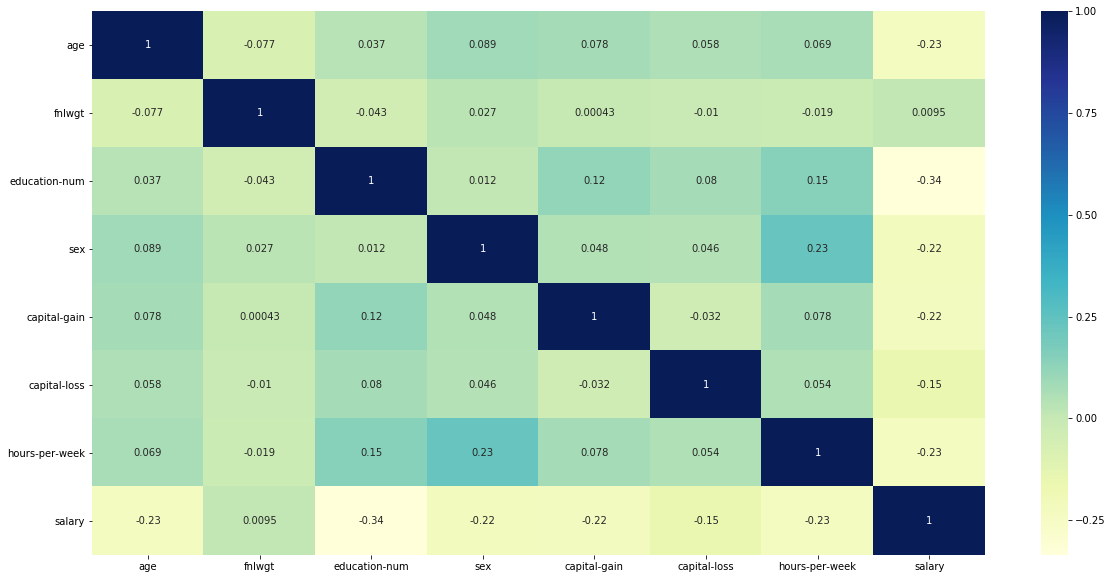

In [23]:
co = train.corr()
# lets try to visualize this using a heatmap
# plotting the heatmap
sns.heatmap(co, cmap='YlGnBu', annot=True, 
        xticklabels=co.columns,
        yticklabels=co.columns)

In [24]:
co

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.076646,0.036527,0.088832,0.077674,0.057775,0.068756,-0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.026858,0.000432,-0.010252,-0.018768,0.009463
education-num,0.036527,-0.043195,1.000000,0.012280,0.122630,0.079923,0.148123,-0.335154
sex,0.088832,0.026858,0.012280,1.000000,0.048480,0.045567,0.229309,-0.215980
capital-gain,0.077674,0.000432,0.122630,0.048480,1.000000,-0.031615,0.078409,-0.223329
capital-loss,0.057775,-0.010252,0.079923,0.045567,-0.031615,1.000000,0.054256,-0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.229309,0.078409,0.054256,1.000000,-0.229689
salary,-0.234037,0.009463,-0.335154,-0.215980,-0.223329,-0.150526,-0.229689,1.000000


Inference

- It is clear that the hours-per-week and age have a positive corelation
- Hours-per-week and capital gain also have a positive corelation

### Drop empty value marked as '?'

In [25]:
# for training set
print (train.shape)
train['native-country'] = train['native-country'].replace('?',np.nan)
train['workclass'] = train['workclass'].replace('?',np.nan)
train['occupation'] = train['occupation'].replace('?',np.nan)

train.dropna(how='any',inplace=True)

print (train.shape)
print (train.head(10))

(32561, 15)
(30162, 15)
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race  sex  \
0          Never-married       Adm-clerical  Not-in-family  White    1   
1     Married-civ-spouse    Exec-managerial        Husband  White    1   
2               Divorced  Handlers-cleaners  Not-in-family  White    1 

In [26]:
# for test set
print (test.shape)
test['native-country'] = test['native-country'].replace('?',np.nan)
test['workclass'] = test['workclass'].replace('?',np.nan)
test['occupation'] = test['occupation'].replace('?',np.nan)

test.dropna(how='any',inplace=True)

print (test.shape)
print (test.head(10))

(16281, 15)
(15060, 15)
    age         workclass  fnlwgt     education  education-num  \
0    25           Private  226802          11th              7   
1    38           Private   89814       HS-grad              9   
2    28         Local-gov  336951    Assoc-acdm             12   
3    44           Private  160323  Some-college             10   
5    34           Private  198693          10th              6   
7    63  Self-emp-not-inc  104626   Prof-school             15   
8    24           Private  369667  Some-college             10   
9    55           Private  104996       7th-8th              4   
10   65           Private  184454       HS-grad              9   
11   36       Federal-gov  212465     Bachelors             13   

        marital-status         occupation   relationship   race  sex  \
0        Never-married  Machine-op-inspct      Own-child  Black    1   
1   Married-civ-spouse    Farming-fishing        Husband  White    1   
2   Married-civ-spouse    Protect

### Categorise in Indian and Non-Indian guests

In [27]:
# Here i have two options
#  1. Using One-Hot-Encoding, but that will produce way too many columns
#  2. I will treat all US citizens as Indians, (because indians are very less in the list)
# And-Non US citizens will be Non-Indians

In [28]:
print(train[['native-country','salary']].groupby(['native-country']).mean())

                              salary
native-country                      
Cambodia                    0.611111
Canada                      0.663551
China                       0.705882
Columbia                    0.964286
Cuba                        0.728261
Dominican-Republic          0.970149
Ecuador                     0.851852
El-Salvador                 0.910000
England                     0.651163
France                      0.555556
Germany                     0.656250
Greece                      0.724138
Guatemala                   0.952381
Haiti                       0.904762
Holand-Netherlands          1.000000
Honduras                    0.916667
Hong                        0.684211
Hungary                     0.769231
India                       0.600000
Iran                        0.571429
Ireland                     0.791667
Italy                       0.647059
Jamaica                     0.875000
Japan                       0.610169
Laos                        0.882353
M

In [29]:
#for training set
for dataset in train_data:
    dataset.loc[dataset['native-country'] != 'United-States', 'native-country'] = 'Non-Indian'
    dataset.loc[dataset['native-country'] == 'United-States', 'native-country'] = 'Indian'

In [30]:
# for test set
for dataset in test_data:
    dataset.loc[dataset['native-country'] != 'United-States', 'native-country'] = 'Non-Indian'
    dataset.loc[dataset['native-country'] == 'United-States', 'native-country'] = 'Indian'

In [31]:
train.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,Indian,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,Indian,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,Indian,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,Indian,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Non-Indian,1


In [32]:
test.tail(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,1,0,0,40,Indian,1
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36,Indian,1
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50,Indian,1
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,5455,0,40,Indian,1
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,60,Indian,0


In [33]:
# converting native-country to integers
# for training set
train['native-country'] = train['native-country'].map({'Indian':1,'Non-Indian':0}).astype(int)

In [34]:
# for test data
test['native-country'] = test['native-country'].map({'Indian':1,'Non-Indian':0}).astype(int)

In [35]:
train.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1


In [36]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,1,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,1,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,1,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,1,0,0,30,1,1


### Categorise marital-status into single and couple

In [37]:
# for training data
train['marital-status'] = train['marital-status'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'],'Single')
train['marital-status'] = train['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'],'Couple')

train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,Couple,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,Single,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Couple,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,Single,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,Couple,Exec-managerial,Husband,White,1,5178,0,40,1,0


In [38]:
# for test data
test['marital-status'] = test['marital-status'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'],'Single')
test['marital-status'] = test['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'],'Couple')

test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Single,Machine-op-inspct,Own-child,Black,1,0,0,40,1,1
1,38,Private,89814,HS-grad,9,Couple,Farming-fishing,Husband,White,1,0,0,50,1,1
2,28,Local-gov,336951,Assoc-acdm,12,Couple,Protective-serv,Husband,White,1,0,0,40,1,0
3,44,Private,160323,Some-college,10,Couple,Machine-op-inspct,Husband,Black,1,7688,0,40,1,0
5,34,Private,198693,10th,6,Single,Other-service,Not-in-family,White,1,0,0,30,1,1
7,63,Self-emp-not-inc,104626,Prof-school,15,Couple,Prof-specialty,Husband,White,1,3103,0,32,1,0
8,24,Private,369667,Some-college,10,Single,Other-service,Unmarried,White,0,0,0,40,1,1
9,55,Private,104996,7th-8th,4,Couple,Craft-repair,Husband,White,1,0,0,10,1,1
10,65,Private,184454,HS-grad,9,Couple,Machine-op-inspct,Husband,White,1,6418,0,40,1,0
11,36,Federal-gov,212465,Bachelors,13,Couple,Adm-clerical,Husband,White,1,0,0,40,1,1


In [39]:
# converting to integer
# for training data
train['marital-status'] = train['marital-status'].map({'Couple':0,'Single':1})
train.head(10)

# for training data
test['marital-status'] = test['marital-status'].map({'Couple':0,'Single':1})

In [40]:
# converting relationsip to integer
# for training data
relation_map = {'Unmarried':0,'Wife':1,'Husband':2,'Not-in-family':3,'Own-child':4,'Other-relative':5}
train['relationship'] = train['relationship'].map(relation_map)
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,White,1,5178,0,40,1,0


In [41]:
# for test data
test['relationship'] = test['relationship'].map(relation_map)
test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,Black,1,0,0,40,1,1
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,White,1,0,0,50,1,1
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,White,1,0,0,40,1,0
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,Black,1,7688,0,40,1,0
5,34,Private,198693,10th,6,1,Other-service,3,White,1,0,0,30,1,1
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,2,White,1,3103,0,32,1,0
8,24,Private,369667,Some-college,10,1,Other-service,0,White,0,0,0,40,1,1
9,55,Private,104996,7th-8th,4,0,Craft-repair,2,White,1,0,0,10,1,1
10,65,Private,184454,HS-grad,9,0,Machine-op-inspct,2,White,1,6418,0,40,1,0
11,36,Federal-gov,212465,Bachelors,13,0,Adm-clerical,2,White,1,0,0,40,1,1


In [42]:
# converting race to integer
# for training set
race_map={'White':0,'Amer-Indian-Eskimo':1,'Asian-Pac-Islander':2,'Black':3,'Other':4}
train['race']= train['race'].map(race_map)
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0


In [43]:
# for test set
test['race']= test['race'].map(race_map)
test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,3,1,0,0,40,1,1
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,0,1,0,0,50,1,1
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,0,1,0,0,40,1,0
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,3,1,7688,0,40,1,0
5,34,Private,198693,10th,6,1,Other-service,3,0,1,0,0,30,1,1
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,2,0,1,3103,0,32,1,0
8,24,Private,369667,Some-college,10,1,Other-service,0,0,0,0,0,40,1,1
9,55,Private,104996,7th-8th,4,0,Craft-repair,2,0,1,0,0,10,1,1
10,65,Private,184454,HS-grad,9,0,Machine-op-inspct,2,0,1,6418,0,40,1,0
11,36,Federal-gov,212465,Bachelors,13,0,Adm-clerical,2,0,1,0,0,40,1,1


In [44]:
# converting worktype into intger
# i will simplify it, by first categorizing the values in 'workclass' as govt, private, self-employed or without_pay
# i will then encode them using map

#utility function for categorizing values in workclass
def f(x):
    if x['workclass'] == 'Federal-gov' or x['workclass']== 'Local-gov' or x['workclass']=='State-gov': return 'govt'
    elif x['workclass'] == 'Private':return 'private'
    elif x['workclass'] == 'Self-emp-inc' or x['workclass'] == 'Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
# for training data
train['employment_type']=train.apply(f, axis=1)
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,private
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1,private
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1,private
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0,self_employed
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0,private
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0,private


In [45]:
# for test data
test['employment_type']=test.apply(f, axis=1)
test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,3,1,0,0,40,1,1,private
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,0,1,0,0,50,1,1,private
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,0,1,0,0,40,1,0,govt
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,3,1,7688,0,40,1,0,private
5,34,Private,198693,10th,6,1,Other-service,3,0,1,0,0,30,1,1,private
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,2,0,1,3103,0,32,1,0,self_employed
8,24,Private,369667,Some-college,10,1,Other-service,0,0,0,0,0,40,1,1,private
9,55,Private,104996,7th-8th,4,0,Craft-repair,2,0,1,0,0,10,1,1,private
10,65,Private,184454,HS-grad,9,0,Machine-op-inspct,2,0,1,6418,0,40,1,0,private
11,36,Federal-gov,212465,Bachelors,13,0,Adm-clerical,2,0,1,0,0,40,1,1,govt


In [46]:
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}

# for training data
train['employment_type'] = train['employment_type'].map(employment_map)
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0,1


In [47]:
# for test data
test['employment_type'] = test['employment_type'].map(employment_map)
test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,3,1,0,0,40,1,1,1
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,0,1,0,0,50,1,1,1
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,0,1,0,0,40,1,0,0
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,3,1,7688,0,40,1,0,1
5,34,Private,198693,10th,6,1,Other-service,3,0,1,0,0,30,1,1,1
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,2,0,1,3103,0,32,1,0,2
8,24,Private,369667,Some-college,10,1,Other-service,0,0,0,0,0,40,1,1,1
9,55,Private,104996,7th-8th,4,0,Craft-repair,2,0,1,0,0,10,1,1,1
10,65,Private,184454,HS-grad,9,0,Machine-op-inspct,2,0,1,6418,0,40,1,0,1
11,36,Federal-gov,212465,Bachelors,13,0,Adm-clerical,2,0,1,0,0,40,1,1,0


In [48]:
train['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [49]:
# I will do the same for educataion, and occupation
# for education
def f2(x):
    if x['education'] == 'Bachelors' or x['workclass']== 'Masters' or x['workclass']=='Some-college' or x['workclass']=='Doctorate' or x['workclass']=='Prof-school' or x['workclass']=='HS-grad'  or x['workclass']=='Assoc-acdm'  or x['workclass']=='12th' or x['workclass']=='Assoc-voc': return 'highly-qualified'
    elif x['education'] == '11th' or x['education'] == '9th' or x['education'] == '7th-8th'  or x['education'] == '10th':return 'literate'
    elif x['education'] == 'Preschool' or x['education'] == '1st-4th' or x['education'] == '5th-6th': return 'illiterate'
    else: return 'illiterate'

In [50]:
# for training data
train['education_type']=train.apply(f2, axis=1)
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,education_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,0,highly-qualified
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,2,highly-qualified
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,1,illiterate
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,1,literate
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,1,highly-qualified
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1,1,illiterate
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1,1,literate
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0,2,illiterate
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0,1,illiterate
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0,1,highly-qualified


In [51]:
# for test data
test['education_type']=train.apply(f2, axis=1)
test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,education_type
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,3,1,0,0,40,1,1,1,highly-qualified
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,0,1,0,0,50,1,1,1,highly-qualified
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,0,1,0,0,40,1,0,0,illiterate
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,3,1,7688,0,40,1,0,1,literate
5,34,Private,198693,10th,6,1,Other-service,3,0,1,0,0,30,1,1,1,illiterate
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,2,0,1,3103,0,32,1,0,2,illiterate
8,24,Private,369667,Some-college,10,1,Other-service,0,0,0,0,0,40,1,1,1,illiterate
9,55,Private,104996,7th-8th,4,0,Craft-repair,2,0,1,0,0,10,1,1,1,highly-qualified
10,65,Private,184454,HS-grad,9,0,Machine-op-inspct,2,0,1,6418,0,40,1,0,1,illiterate
11,36,Federal-gov,212465,Bachelors,13,0,Adm-clerical,2,0,1,0,0,40,1,1,0,highly-qualified


In [52]:
employment_map = {'illiterate':0,'literate':1,'highly-qualified':2}

# for training data
train['education_type'] = train['education_type'].map(employment_map)
train.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,education_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,0,2
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,2,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,1,0
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,1,2
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1,1,0
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1,1,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0,2,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0,1,2


In [53]:
# for test data
test['education_type'] = test['education_type'].map(employment_map)
test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,education_type
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,3,1,0,0,40,1,1,1,2.0
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,0,1,0,0,50,1,1,1,2.0
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,0,1,0,0,40,1,0,0,0.0
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,3,1,7688,0,40,1,0,1,1.0
5,34,Private,198693,10th,6,1,Other-service,3,0,1,0,0,30,1,1,1,0.0
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,2,0,1,3103,0,32,1,0,2,0.0
8,24,Private,369667,Some-college,10,1,Other-service,0,0,0,0,0,40,1,1,1,0.0
9,55,Private,104996,7th-8th,4,0,Craft-repair,2,0,1,0,0,10,1,1,1,2.0
10,65,Private,184454,HS-grad,9,0,Machine-op-inspct,2,0,1,6418,0,40,1,0,1,0.0
11,36,Federal-gov,212465,Bachelors,13,0,Adm-clerical,2,0,1,0,0,40,1,1,0,2.0


In [54]:
train['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [55]:
# i will not use the occupation feature and i will drop occupation, education, and workclass
train.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
train.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,education_type
0,39,77516,13,1,3,0,1,2174,0,40,1,1,0,2
1,50,83311,13,0,2,0,1,0,0,13,1,1,2,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1,0
3,53,234721,7,0,2,3,1,0,0,40,1,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1,2
5,37,284582,14,0,1,0,0,0,0,40,1,1,1,0
6,49,160187,5,1,3,3,0,0,0,16,0,1,1,1
7,52,209642,9,0,2,0,1,0,0,45,1,0,2,0
8,31,45781,14,1,3,0,0,14084,0,50,1,0,1,0
9,42,159449,13,0,2,0,1,5178,0,40,1,0,1,2


In [56]:
test.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
test.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,education_type
0,25,226802,7,1,4,3,1,0,0,40,1,1,1,2.0
1,38,89814,9,0,2,0,1,0,0,50,1,1,1,2.0
2,28,336951,12,0,2,0,1,0,0,40,1,0,0,0.0
3,44,160323,10,0,2,3,1,7688,0,40,1,0,1,1.0
5,34,198693,6,1,3,0,1,0,0,30,1,1,1,0.0
7,63,104626,15,0,2,0,1,3103,0,32,1,0,2,0.0
8,24,369667,10,1,0,0,0,0,0,40,1,1,1,0.0
9,55,104996,4,0,2,0,1,0,0,10,1,1,1,2.0
10,65,184454,9,0,2,0,1,6418,0,40,1,0,1,0.0
11,36,212465,13,0,2,0,1,0,0,40,1,1,0,2.0


In [57]:
test['education_type'] = test['education_type'].values.astype(np.int64)
test['education_type'].dtype

dtype('int64')

In [58]:
test.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,education_type
0,25,226802,7,1,4,3,1,0,0,40,1,1,1,2
1,38,89814,9,0,2,0,1,0,0,50,1,1,1,2
2,28,336951,12,0,2,0,1,0,0,40,1,0,0,0
3,44,160323,10,0,2,3,1,7688,0,40,1,0,1,1
5,34,198693,6,1,3,0,1,0,0,30,1,1,1,0


In [59]:
train.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,education_type
0,39,77516,13,1,3,0,1,2174,0,40,1,1,0,2
1,50,83311,13,0,2,0,1,0,0,13,1,1,2,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1,0
3,53,234721,7,0,2,3,1,0,0,40,1,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1,2


In [60]:
test.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,education_type
0,25,226802,7,1,4,3,1,0,0,40,1,1,1,2
1,38,89814,9,0,2,0,1,0,0,50,1,1,1,2
2,28,336951,12,0,2,0,1,0,0,40,1,0,0,0
3,44,160323,10,0,2,3,1,7688,0,40,1,0,1,1
5,34,198693,6,1,3,0,1,0,0,30,1,1,1,0


In [61]:
train.loc[(train['capital-gain'] > 0),'capital-gain'] = 1
train.loc[(train['capital-gain'] == 0 ,'capital-gain')]= 0

In [62]:
test.loc[(test['capital-gain'] > 0),'capital-gain'] = 1
test.loc[(test['capital-gain'] == 0 ,'capital-gain')]= 0

In [63]:
train.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,education_type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0,2
1,50,83311,13,0,2,0,1,0,0,13,1,1,2,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1,0
3,53,234721,7,0,2,3,1,0,0,40,1,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1,2


In [64]:
train.loc[(train['capital-loss'] > 0),'capital-loss'] = 1
train.loc[(train['capital-loss'] == 0 ,'capital-loss')]= 0

test.loc[(test['capital-loss'] > 0),'capital-loss'] = 1
test.loc[(test['capital-loss'] == 0 ,'capital-loss')]= 0

In [65]:
train['age'].count()

30162

In [66]:
train.describe()

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,employment_type,education_type
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,0.532989,2.381109,0.379650,0.675685,0.084146,0.047311,40.931238,0.911876,0.751078,0.977190,0.429945
std,13.134665,1.056530e+05,2.549995,0.498919,1.200446,0.973227,0.468126,0.277611,0.212307,11.979984,0.283480,0.432396,0.511863,0.761296
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.484705e+06,16.000000,1.000000,5.000000,4.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,3.000000,2.000000


# Applying ML Model to the cleaned dataset

In [100]:
# my data is alreayd divided into train and test set
# however I will have to drop the 'salary' column from the test set
y_test = test['salary']
x_test = test.drop(['salary'], axis=1)

In [101]:
from sklearn.model_selection import train_test_split

y_train = train['salary']
X_train = train.drop(['salary'], axis=1)
# X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.2,random_state=22)

In [102]:
# I will try 3 different algorithms, and choose the one with the best accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [103]:
models = []
names = ['LR','Random Forest','DecisionTreeClassifier',]

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((DecisionTreeClassifier()))

In [104]:
print(models)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random

In [105]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [106]:
kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

/Users/sherlock/Documents/machine-learning/python-venvs/data-sci/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sherlock/Documents/machine-learning/python-venvs/data-sci/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sherlock/Documents/machine-learning/python-venvs/data-sci/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sherlock/Documents/machine-learning/python-venvs/data-sci/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this wa

----------------------------------------
LR: 0.756340129288911
----------------------------------------
Random Forest: 0.9991712249295541
----------------------------------------
DecisionTreeClassifier: 0.9991712249295541


I will proceed with Random Forest

In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [111]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(x_test)

In [113]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.8266268260292164
----------------------------------------
Confusion Matrix:
[[ 2131  1569]
 [ 1042 10318]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62      3700
           1       0.87      0.91      0.89     11360

   micro avg       0.83      0.83      0.83     15060
   macro avg       0.77      0.74      0.75     15060
weighted avg       0.82      0.83      0.82     15060



In [127]:
prediction.shape

(15060,)

- I have 15060, inputs(guests) in the test set.

- I will now select the rows from x_test, for which prediction=1

In [149]:
n = prediction.shape[0]

In [150]:
df = pd.DataFrame()

In [151]:
for i in range(n):
    if prediction[i] == 1:
        df = df.append(x_test.iloc[i, :])

In [152]:
df.head()

,age,capital-gain,capital-loss,education-num,education_type,employment_type,fnlwgt,hours-per-week,marital-status,native-country,race,relationship,sex
0,25.0,0.0,0.0,7.0,2.0,1.0,226802.0,40.0,1.0,1.0,3.0,4.0,1.0
1,38.0,0.0,0.0,9.0,2.0,1.0,89814.0,50.0,0.0,1.0,0.0,2.0,1.0
5,34.0,0.0,0.0,6.0,0.0,1.0,198693.0,30.0,1.0,1.0,0.0,3.0,1.0
8,24.0,0.0,0.0,10.0,0.0,1.0,369667.0,40.0,1.0,1.0,0.0,0.0,0.0
9,55.0,0.0,0.0,4.0,2.0,1.0,104996.0,10.0,0.0,1.0,0.0,2.0,1.0


In [153]:
df.shape

(11887, 13)

- So I get 11887 people who are rich
- I have to invite 90% of these people

In [157]:
temp = df.shape[0]
print(temp)
ninety_percent = 0.9 * temp
print(ninety_percent)

11887
10698.300000000001


# So there will be ~10700 guestes at Mr. Ambani's daughters wedding

In [159]:
df = df.iloc[0:10698, :]

In [160]:
df.shape

(10698, 13)

# 'df' now holds the list of people who will be invited to the party

# Saving the list to a csv file

In [161]:
df.to_csv('guest_list.csv', sep=',', encoding='utf-8')

In [162]:
df.shape

(10698, 13)